# Churn Analysis

**Dataset Info:** Data Set containing Bank customer data

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the data

In [2]:
df=pd.read_csv(r"C:\Users\neera\Desktop\churn.csv")

Top 5 rows of data

In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


Deleting the first three columns as they are useless.

In [4]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'RowNumber'], axis=1, inplace=True)

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [6]:
# Checking the data types of all the columns
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


50% customers have credit score below 652 whereas only 25% have credit score above 718.

75% customers are below 44 years.

Only 25% customers have tenure more than to 7 years.

50% customers have salary below 1,00,194 Euros.

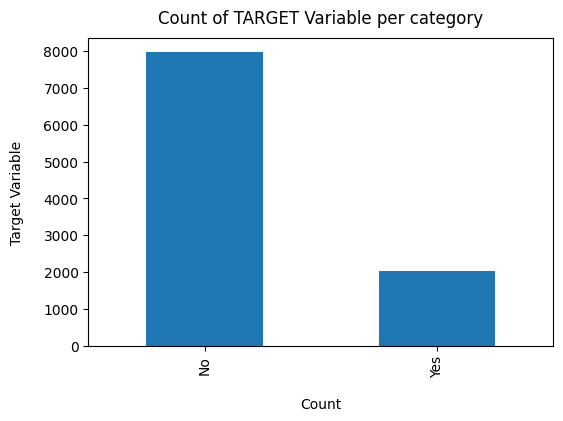

In [8]:
df['Exited'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*df['Exited'].value_counts()/len(df['Exited'])

No     79.63
Yes    20.37
Name: Exited, dtype: float64

In [10]:
df['Exited'].value_counts()

No     7963
Yes    2037
Name: Exited, dtype: int64

Data is highly imbalanced, ratio = 80:20. 
So we analyse the data with other features while taking the target values separately to get some insights.



In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB


In [12]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



* Here, we do not have any missing data.


General Thumb Rules:
* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.



## Data Cleaning

In [13]:
# Create a copy of base data for manupulation & processing
df1=df.copy()

In [14]:
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [15]:
#To retrieve duplicated rows
df1[df1['CustomerId'].duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [16]:
df1[['CustomerId']].duplicated().value_counts()

False    10000
dtype: int64

* No duplicate rows were found.

Dividing customers into bins based on tenure

In [17]:
print(df1['Tenure'].max())

10


In [18]:
labels = ['0-2','2-4','4-6','6-8','8-10']

bins = np.linspace(min(df1["Tenure"]), max(df1["Tenure"]), 6)
df1['Tenure-group'] = pd.cut(df1['Tenure'], bins, include_lowest=True, labels=labels )
df1['Tenure-group'].value_counts()

0-2     2496
6-8     2053
2-4     1998
4-6     1979
8-10    1474
Name: Tenure-group, dtype: int64

In [19]:
print(df1['Age'].max())

92


In [20]:
labels = ['1-20','20-40','40-60','60-80','80-100']

bins = np.linspace(0, 100, 6)
df1['Age-group'] = pd.cut(df1['Age'], bins, include_lowest=True, labels=labels )
df1['Age-group'].value_counts()

20-40     6330
40-60     3117
60-80      452
1-20        89
80-100      12
Name: Age-group, dtype: int64

In [21]:
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure-group,Age-group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,0-2,40-60
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,0-2,40-60
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,6-8,40-60
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,0-2,20-40
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,0-2,40-60


Remove columns not required for processing

In [22]:
#drop column customerID and tenure
df1.drop(columns= ['CustomerId','Tenure','Surname','Age'], axis=1, inplace=True)
df1.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure-group,Age-group
0,619,France,Female,0.00,1,Yes,Yes,101348.88,Yes,0-2,40-60
1,608,Spain,Female,83807.86,1,No,Yes,112542.58,No,0-2,40-60
2,502,France,Female,159660.80,3,Yes,No,113931.57,Yes,6-8,40-60
3,699,France,Female,0.00,2,No,No,93826.63,No,0-2,20-40
4,850,Spain,Female,125510.82,1,Yes,Yes,79084.10,No,0-2,40-60


## Data Exploration

Plot distibution of individual predictors by churn(Exited)

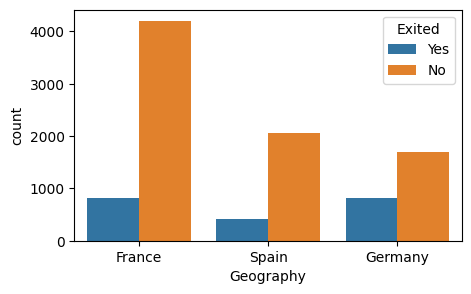

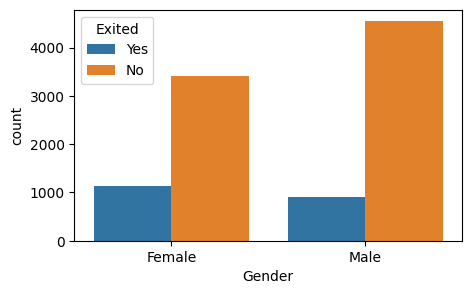

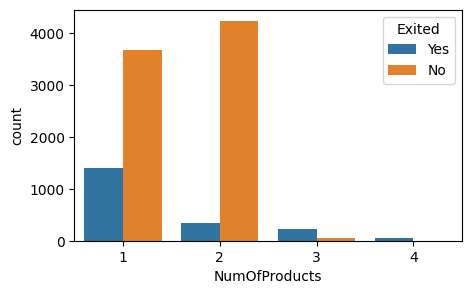

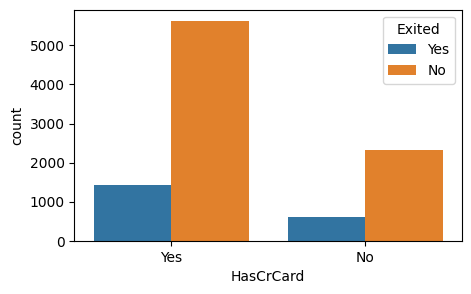

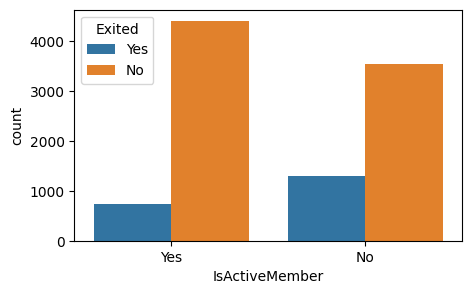

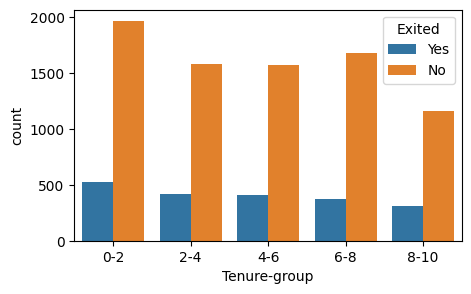

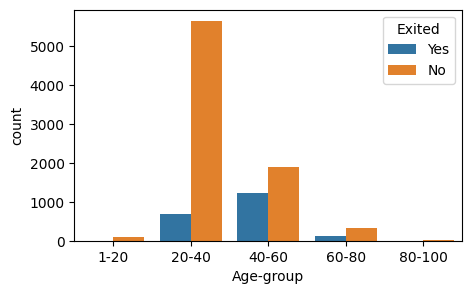

In [23]:
df2=df1.drop(columns=['Exited', 'EstimatedSalary', 'Balance','CreditScore'])
for i, predictor in enumerate(df2):
    plt.figure(i,figsize=(5, 3))
    sns.countplot(data=df1, x=predictor, hue='Exited')

In [24]:
df1.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure-group,Age-group
0,619,France,Female,0.00,1,Yes,Yes,101348.88,Yes,0-2,40-60
1,608,Spain,Female,83807.86,1,No,Yes,112542.58,No,0-2,40-60
2,502,France,Female,159660.80,3,Yes,No,113931.57,Yes,6-8,40-60
3,699,France,Female,0.00,2,No,No,93826.63,No,0-2,20-40
4,850,Spain,Female,125510.82,1,Yes,Yes,79084.10,No,0-2,40-60


In [25]:
df1['Exited'] = np.where(df1.Exited == 'Yes',1,0)

In [26]:
df1.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure-group,Age-group
0,619,France,Female,0.00,1,Yes,Yes,101348.88,1,0-2,40-60
1,608,Spain,Female,83807.86,1,No,Yes,112542.58,0,0-2,40-60
2,502,France,Female,159660.80,3,Yes,No,113931.57,1,6-8,40-60
3,699,France,Female,0.00,2,No,No,93826.63,0,0-2,20-40
4,850,Spain,Female,125510.82,1,Yes,Yes,79084.10,0,0-2,40-60


Converting all categorical varibles in dummy variables.

In [27]:
df_d = pd.get_dummies(df1)
df_d.head()

,CreditScore,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,...,Tenure-group_0-2,Tenure-group_2-4,Tenure-group_4-6,Tenure-group_6-8,Tenure-group_8-10,Age-group_1-20,Age-group_20-40,Age-group_40-60,Age-group_60-80,Age-group_80-100
0,619,0.00,1,101348.88,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,608,83807.86,1,112542.58,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,502,159660.80,3,113931.57,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,699,0.00,2,93826.63,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,850,125510.82,1,79084.10,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


 ### Finding relationships between different variables

* Balance and Credit Score

<Axes: xlabel='CreditScore', ylabel='Balance'>

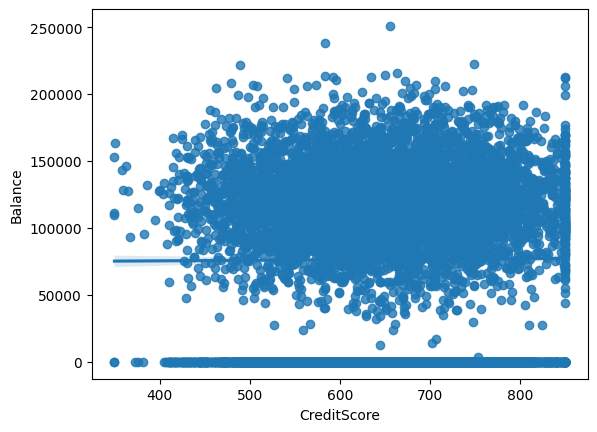

In [28]:
sns.regplot(x="CreditScore", y="Balance", data=df1)

* Credit Score and Estimated Salary

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

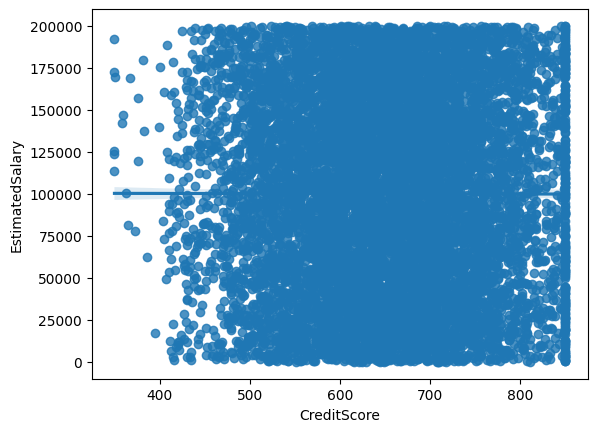

In [29]:
sns.regplot(x="CreditScore", y="EstimatedSalary", data=df1)

* Balance and Estimated Salary

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

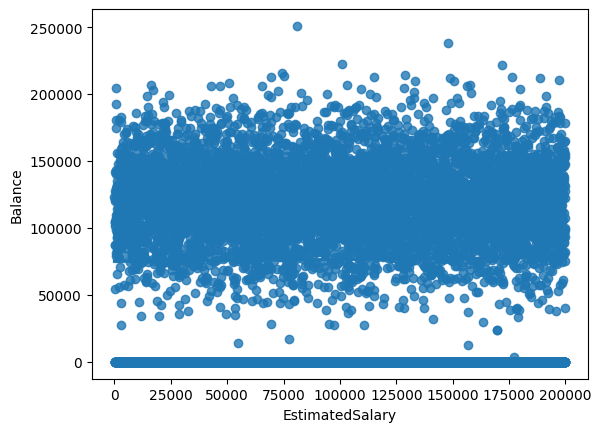

In [30]:
sns.regplot(x="EstimatedSalary", y="Balance", data=df1)

**Insight:** There is no relationship among Balance, Estimated Salary and Credit Score

### Churn by Credit Score, Estimated Salary and Balance

C:\Users\neera\AppData\Local\Temp\ipykernel_15752\4219701311.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.CreditScore[(df1["Exited"] == 0) ],
C:\Users\neera\AppData\Local\Temp\ipykernel_15752\4219701311.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.CreditScore[(df1["Exited"] == 1) ],


Text(0.5, 1.0, 'Churn by Credit Score')

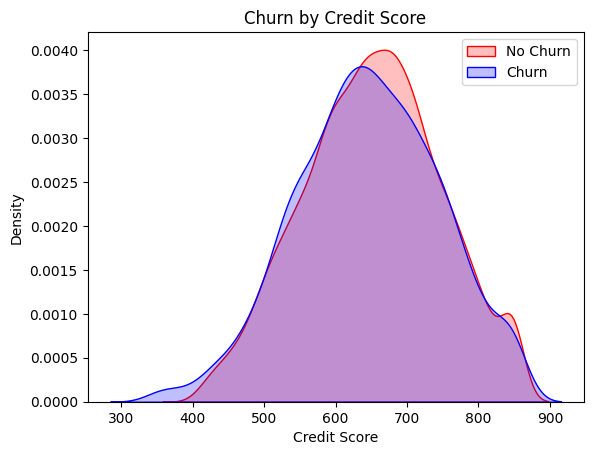

In [31]:
Mth = sns.kdeplot(df1.CreditScore[(df1["Exited"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df1.CreditScore[(df1["Exited"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Credit Score')
Mth.set_title('Churn by Credit Score')



**Insight** : Churn is high when credit score is average.

C:\Users\neera\AppData\Local\Temp\ipykernel_15752\3985218824.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.Balance[(df1["Exited"] == 0) ],
C:\Users\neera\AppData\Local\Temp\ipykernel_15752\3985218824.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.Balance[(df1["Exited"] == 1) ],


Text(0.5, 1.0, 'Churn by Balance')

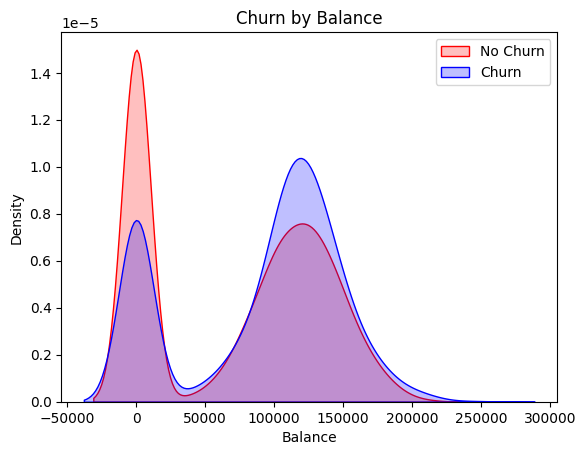

In [32]:
Mth = sns.kdeplot(df1.Balance[(df1["Exited"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df1.Balance[(df1["Exited"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Balance')
Mth.set_title('Churn by Balance')



**Insight** : Churn is high when balance is either extremely lower or higher.

C:\Users\neera\AppData\Local\Temp\ipykernel_15752\841219847.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.EstimatedSalary[(df1["Exited"] == 0) ],
C:\Users\neera\AppData\Local\Temp\ipykernel_15752\841219847.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.EstimatedSalary[(df1["Exited"] == 1) ],


Text(0.5, 1.0, 'Churn by Estimated Salary')

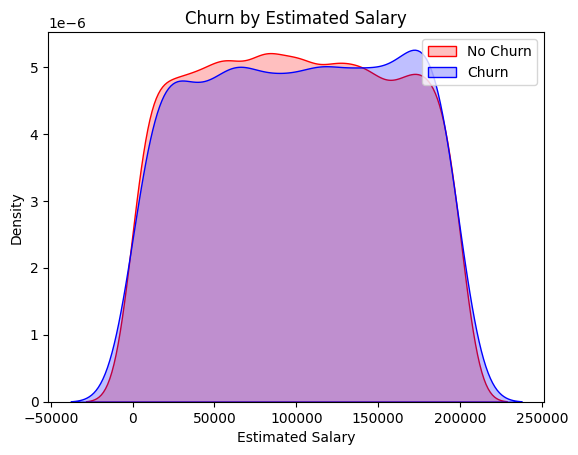

In [33]:
Mth = sns.kdeplot(df1.EstimatedSalary[(df1["Exited"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df1.EstimatedSalary[(df1["Exited"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Estimated Salary')
Mth.set_title('Churn by Estimated Salary')



**Insight** : Churn increases slightly when estimated salary is high.

<Axes: >

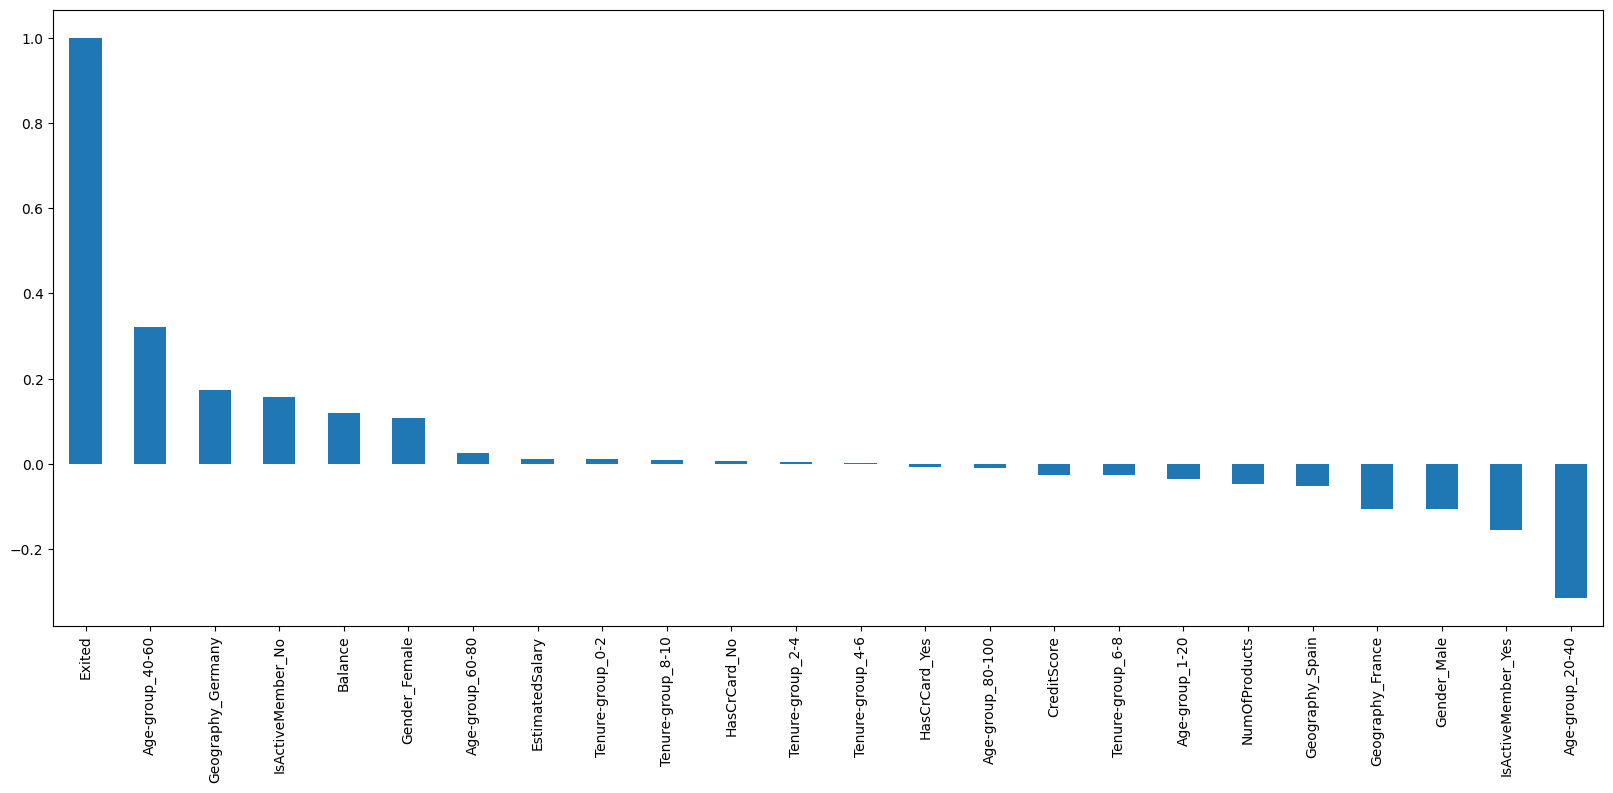

In [34]:
plt.figure(figsize=(20,8))
df_d.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

**Derived Insights:** 

High churn is seen in case of **40-60 Age group, German customers, Non active members,** and **Female customers**

Low churn is seen in case of **20-40 Age group, is an active member, male customers**, and **French customers**

Factors like **Tenure group and credit** card have almost **no impact** on churn.

In [35]:
df_d.to_csv(r"C:\Users\neera\Desktop\churndummy.csv", index="False")